**SEABORN**

**Exercices**

**Exercice 1 -  Visualisation des notes des étudiants :**
* a) Chargez le fichier "student_grades.csv" dans un DataFrame nommé "grades_df".
* b) Utilisez Seaborn pour créer un histogramme représentant la distribution des notes des étudiants.


In [ ]:
import pandas as pd

path_csv = "student_grades.csv"
grades_df = pd.read_csv(path_csv, header=None, names=['ID', 'salle', 'note'])

# Création d'un dictionnaire pour faire correspondre les notes alphabetiques avec les notes numeriques
grade_to_num = {
    'E-': 0, 'E': 1, 'E+': 2,
    'D-': 3, 'D': 4, 'D+': 5,
    'C-': 6, 'C': 7, 'C+': 8,
    'B-': 9, 'B': 10, 'B+': 11,
    'A-': 12, 'A': 13, 'A+': 14,
}

# On place donc les valeurs decimales associées aux notes alphabetiques grace au map dans une nouvelle colonne note_dec
grades_df['note_dec'] = grades_df['note'].map(grade_to_num)

# On transforme en note sur 20
# Avec fonction .apply
grades_df['note_dec'] = grades_df['note_dec'].apply(lambda x: (x / 14) * 20)

# Version sans fonction, mais avec operation vectorisée
#grades_df['note_dec'] = (grades_df['note_dec']/14)*20

# Ajout d'une colonne 'result' contenant 'Réussite' si note >=10 sinon 'Echec'   
grades_df['result'] = grades_df['note_dec'].apply(lambda x: "Réussite" if x >= 10 else "Échec")

print(grades_df)

In [ ]:
# installation de seaborn depuis un Notebook Jupyter
%pip install seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.histplot(data=grades_df, x="note_dec", kde=True)

plt.title("Distribution des notes (sur 20)")
plt.xlabel("Note (sur 20)")
plt.ylabel("Quantité")

plt.show()


**Exercice 2 - Comparaison des notes en fonction des salles :**
* a) Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant la moyenne des notes des étudiants pour chaque salle.


In [ ]:
sns.set(style="whitegrid")

sns.barplot(data=grades_df, x="salle", y="note_dec", estimator="mean") # estimator="mean" calcule la moyenne de note_dec par salle (de y par x)

plt.title("Moyenne des notes par salle (/20)")
plt.xlabel("Salle")
plt.ylabel("Moyenne des notes (/20)")

plt.show()


**Exercice 3 - Comparaison des notes en fonction du statut de réussite :**
* a) Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant le nombre d'étudiants ayant réussi et échoué.


In [ ]:
sns.set(style="ticks")

# countplot compte automatiquement les occurences de chaque valeur dans result
sns.countplot(data=grades_df, x = 'result')

plt.title("Nombre d'etudiant ayant reussi vs etudiant ayant echoué")
plt.xlabel("Resultat")
plt.ylabel("Nombred'etudiants")

**Exercice 4 - Visualisation de la corrélation entre les variables :**
* a) Chargez le fichier "titanic.csv" dans un DataFrame nommé "titanic_df".
* b) Utilisez Seaborn pour créer une matrice de corrélation pour les variables numériques du DataFrame "titanic_df".


In [ ]:
# a)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

titanic_df = pd.read_csv(url)

In [ ]:
# Selection des colonnes numeriques 'int64' pour les entiers et 'float64' pour les float
numerical_columns = titanic_df.select_dtypes(include=['int64', 'float64'])

# Creation d'une matrice de correlation sur les valeurs numeriques (seulement les colonnes numeriques) avec Pandas, NumPy possible aussi (cf: np.corrcoef)
correlation_matrix = numerical_columns.corr()

print(correlation_matrix)

# Visualisation avec Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables numeriques de Titanic_DF")
plt.show()

# Correlation positive (+) les deux variables augmentent ensemble
# Exemple : Fare et Survived = 0.26
# Quand le prix du billet augmente, la probabilité de survie tend à augmenter.

# Correaltion negative (-) une variable augmente lautre diminue
# Exemple : Pclass et Survived = -0.34
# Plus la classe est haute (Pclass=1 → première classe), 
# plus la survie augmente → mais comme Pclass=1 < Pclass=3, 
# la corrélation est négative

In [ ]:
# Version avec valeurs absolues perte de la direction 
# Selection des colonnes numeriques
numerical_columns = titanic_df.select_dtypes(include=['int64', 'float64'])

# Creation d'une matrice de correlation sur les valeurs numeriques (seulement les colonnes numeriques) avec Pandas, NumPy possible aussi (cf: np.corrcoef)
correlation_matrix = numerical_columns.corr()
# Création d'une matrice Absolue
correlation_matrix_absolute = correlation_matrix.abs()
print(correlation_matrix)

# Visualisation avec Seaborn
sns.heatmap(correlation_matrix_absolute, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables numeriques de Titanic_DF")
plt.show()

**Exercice 5 - Comparaison des tarifs en fonction du statut de survie :**
* a) Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte (boxplot) montrant la distribution des tarifs payés par les passagers en fonction de leur statut de survie (survit ou non).


In [ ]:
sns.set(style="dark")

# On veut afficher le tarifs payé en fonction de la survie ou de la non survie
sns.boxplot(data=titanic_df, x = 'Survived', y = "Fare")

plt.title("Distribution des parifs payés par les passagers en fonction de leur statut de survie")
plt.xlabel("Survécu=1 Non survecu=0)")
plt.ylabel("Tarif payé")
plt.show()

# La ligne dans la boîte → médiane des tarifs
# La boîte → 50% des tarifs centraux (1er au 3e quartile)
# Les "moustaches" → étendue normale des tarifs
# Les points isolés → outliers (tarifs exceptionnellement élevés ou faibles)

**Exercice 6 - Visualisation des âges des passagers :**
* a) Utilisez le DataFrame "titanic_df" pour créer un histogramme représentant la distribution des âges des passagers.


In [ ]:


sns.set(style="darkgrid")
sns.histplot(data=titanic_df, x="Age", kde=True)

plt.title("Distribution des ages des passagers du Titanic")
plt.xlabel("Age")
plt.ylabel("Nombre de passagers")

plt.show()

In [ ]:
# Version avec dropna() pour supprimer les valeurs vides
sns.set(style="darkgrid")
sns.histplot(data=titanic_df, x=titanic_df["Age"].dropna(), kde=True)

plt.title("Distribution des ages des passagers du Titanic")
plt.xlabel("Age")
plt.ylabel("Nombre de passagers")

plt.show()

In [ ]:
# Version avec dropna() pour supprimer les valeurs vides
sns.set(style="darkgrid")

age = titanic_df['Age'].dropna()
sns.histplot(data=age, kde=True)

plt.title("Distribution des ages des passagers du Titanic")
plt.xlabel("Age")
plt.ylabel("Nombre de passagers")

plt.show()

**Exercice 7 - Comparaison des âges en fonction du statut de survie :**
* a) Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des âges des passagers en fonction de leur statut de survie.


In [ ]:
sns.set(style="white")

# On veut afficher la distribution de l'age des passagers en fonction de leur statut de survie
sns.boxplot(data=titanic_df, x = titanic_df['Survived'].dropna(), y = titanic_df["Age"].dropna() )

plt.title("Distribution de l'age des passagers en fonction de leur statut de survie")
plt.xlabel("Survécu=1 Non survecu=0)")
plt.ylabel("Age")
plt.show()

# La ligne dans la boîte → médiane des tarifs
# La boîte → 50% des tarifs centraux (1er au 3e quartile)
# Les "moustaches" → étendue normale des tarifs
# Les points isolés → outliers (tarifs exceptionnellement élevés ou faibles)

**Exercice 8 - Visualisation de la répartition des tarifs :**
* a) Utilisez le DataFrame "titanic_df" pour créer un histogramme représentant la répartition des tarifs payés par les passagers.


In [ ]:
# Version avec dropna() pour supprimer les valeurs vides
sns.set(style="darkgrid")
sns.histplot(data=titanic_df, x=titanic_df["Fare"].dropna(), bins=10, kde=True)

plt.title("Répartition des tarifs payés par les passagers")
plt.xlabel("Tarif payé")
plt.ylabel("Nombre de passagers")

plt.show()

**Exercice 9 - Comparaison des tarifs en fonction de la classe :**
* a) Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction de leur classe (1ère, 2ème ou 3ème classe).


In [ ]:
sns.set(style='whitegrid')

# boxplot des tarifs en fonction de la classe de leur billet
sns.boxplot(data = titanic_df, x = titanic_df['Pclass'].dropna(), y = titanic_df['Fare'].dropna())

plt.title('Tarifs payés par les passagers en fonction de la classe de leur billet')
plt.xlabel('Classe du billet')
plt.ylabel('Tarif payé')
plt.show

# La ligne dans la boîte → médiane des tarifs
# La boîte → 50% des tarifs centraux (1er au 3e quartile)
# Les "moustaches" → étendue normale des tarifs
# Les points isolés → outliers (tarifs exceptionnellement élevés ou faibles)

**Exercice 10 - Visualisation de la répartition du genre des passagers**
* a) Utilisation du DataFrame "titanic_df" pour créer un histogramme représentant la répartition des genres.


In [ ]:
sns.set(style='dark')

# countplot des genres car le genre est une variable categorique car countplot compte le nombre de passagers par categorie
sns.countplot(data = titanic_df, x = titanic_df['Sex'].dropna())

plt.title('Historigramme de la repartition des genres parmis les passagers du Titanic')
plt.xlabel('Genre')
plt.ylabel('Nombre de passagers')

In [ ]:
# Version prenant en compte la survie par genre
sns.set(style='dark')

# countplot des genres car le genre est une variable categorique car countplot compte le nombre de passagers par categorie
sns.countplot(data = titanic_df, x = titanic_df['Sex'].dropna(), hue = titanic_df['Survived'].dropna())

plt.title('Historigramme de la repartition des genres parmis les passagers du Titanic ayant survecus ou pas')
plt.xlabel('Genre')
plt.ylabel('Nombre de passagers')

**Exercice 11**
Exercice sur le jeu de données "sales_data" :
Le jeu de données "sales_data.csv" contient des informations sur les ventes de produits dans un magasin. Chaque ligne représente une transaction avec les colonnes suivantes :
* >`Date`: La date de la transaction.
* >`Product`: Le nom du produit vendu.
* >`Unit_Price`: Le prix unitaire du produit.
* >`Order_Quantity`: Le nombre d'unités vendues.

Votre tâche est de réaliser les étapes suivantes :
* a) Chargez le fichier "sales_data.csv" dans un DataFrame nommé "sales_df".
* b) Affichez les 10 premières lignes du DataFrame pour visualiser les données.
* c) Calculez le chiffre d'affaires total réalisé sur l'ensemble des transactions.
* d) Tracez un graphique à barres montrant les 5 produits les plus vendus (en termes de quantité) avec le nom du produit sur l'axe des x et la quantité vendue sur l'axe des y


In [ ]:
url = "https://raw.githubusercontent.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/master/data/sales_data.csv"
# a)
sales_df = pd.read_csv(url)


         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   
5  2016-05-15   15       May  2016            47  Adults (35-64)   
6  2014-05-22   22       May  2014            47  Adults (35-64)   
7  2016-05-22   22       May  2016            47  Adults (35-64)   
8  2014-02-22   22  February  2014            35  Adults (35-64)   
9  2016-02-22   22  February  2016            35  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2          

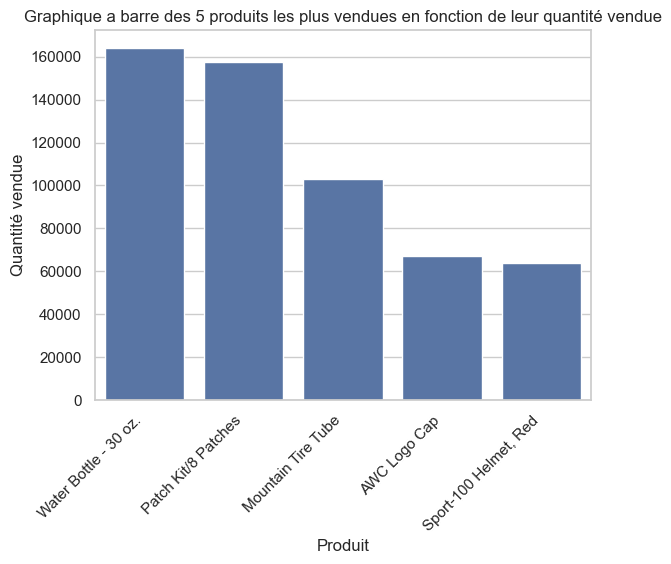

<Figure size 800x500 with 0 Axes>

In [ ]:
# b) affiche les 10 premiere ligne
print(sales_df.head(10))

# c) Chiffre d'affaire total fait sur l'ensemble des transactions
# on ajoute une colonne 'CA_par_transaction' dans notre dataframe sales_df
sales_df['CA_par_transaction'] = sales_df['Unit_Price'] * sales_df['Order_Quantity']
# on fait le somme des valeurs de la nouvelle colonne pour obtenir le CA total
CA_total = sales_df['CA_par_transaction'].sum()
print(f"CA total: {CA_total} $")

# d) calcul des produits les plus vendues
# group by par produit
grouped_by_product = sales_df.groupby('Product')

# on recupere la somme de la colonne Order_Quantity pour chaque produit
sales_total = grouped_by_product['Order_Quantity'].sum()

# tri par nombre de ventes du plus au moins vendu ascending False pour trier par ordre decroissant
sales_total_ordered = sales_total.sort_values(ascending=False)

# on recupere les 5 premiere ligne donc le top des nombres de ventes
top_5_sold_products = sales_total_ordered.head()


# top_5_sold_products = sales_df.groupby('Product')['Order_Quantiy'].sum().sort_values(ascending=False).head(5) # En une ligne

sns.set(style='whitegrid')
sns.barplot(x=top_5_sold_products.index, y = top_5_sold_products.values)

plt.title("Graphique a barre des 5 produits les plus vendues en fonction de leur quantité vendue")
plt.xlabel('Produit')
plt.ylabel('Quantité vendue')
# Affichage incline à droite de 45 degres pour eviter le chevauchement des données en legendes
plt.xticks(rotation=45, ha="right")

# plt.figure(figsize=(8,5)) # se configure correctment automatiquement
plt.show()

In [ ]:
# 1. Regrouper les lignes par produit
grouped = sales_df.groupby("Product")

# 2. Pour chaque produit, récupérer uniquement la colonne Order_Quantity
quantities = grouped["Order_Quantity"]

# 3. Calculer la somme des quantités vendues pour chaque produit
quantities_sum = quantities.sum()

# 4. Trier les produits du plus vendu au moins vendu
sorted_quantities = quantities_sum.sort_values(ascending=False)

# 5. Garder uniquement les 5 premiers produits
top_products = sorted_quantities.head(5)



**Exercice 13 - Comparaison des notes des étudiants en fonction de la salle :**
* Utilisez le DataFrame "grades_df" pour créer un graphique en boîte montrant la distribution des notes des étudiants en fonction de la salle.


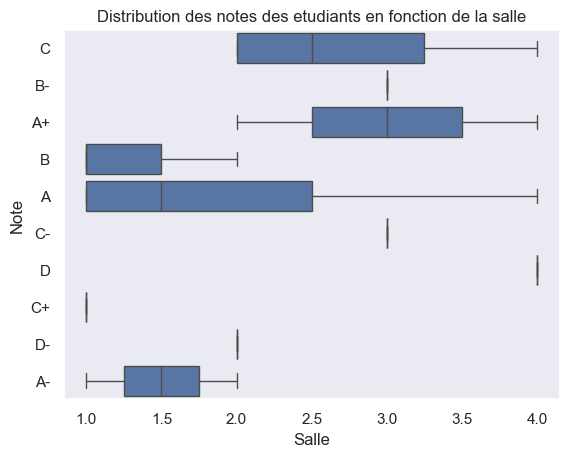

In [ ]:
sns.set(style='dark')

sns.boxplot(data=grades_df, x="salle", y='note')

plt.title('Distribution des notes des etudiants en fonction de la salle')
plt.xlabel('Salle')
plt.ylabel('Note')

plt.show()

# La ligne dans la boîte → médiane des tarifs
# La boîte → 50% des tarifs centraux (1er au 3e quartile)
# Les "moustaches" → étendue normale des tarifs
# Les points isolés → outliers (tarifs exceptionnellement élevés ou faibles)

**Exercice 14 - Visualisation des tarifs des passagers en fonction de la classe :**
* Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction de leur classe.


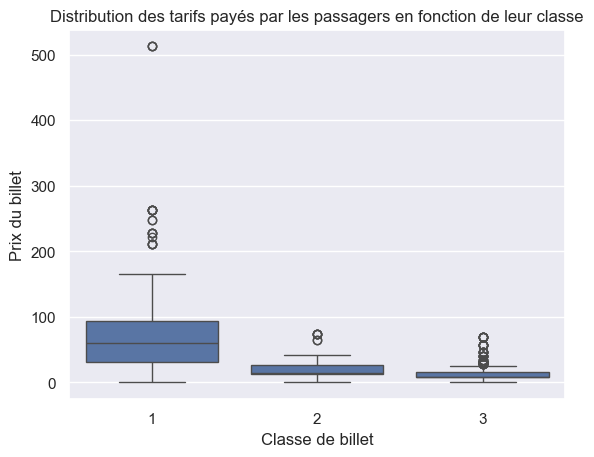

In [70]:
sns.set(style='darkgrid')

sns.boxplot(data=titanic_df, x='Pclass', y='Fare')

plt.title('Distribution des tarifs payés par les passagers en fonction de leur classe')
plt.xlabel('Classe de billet')
plt.ylabel('Prix du billet')

plt.show()

**Exercice 15 - Comparaison des tarifs des passagers en fonction du port d'embarquement :**
* Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction du port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton).


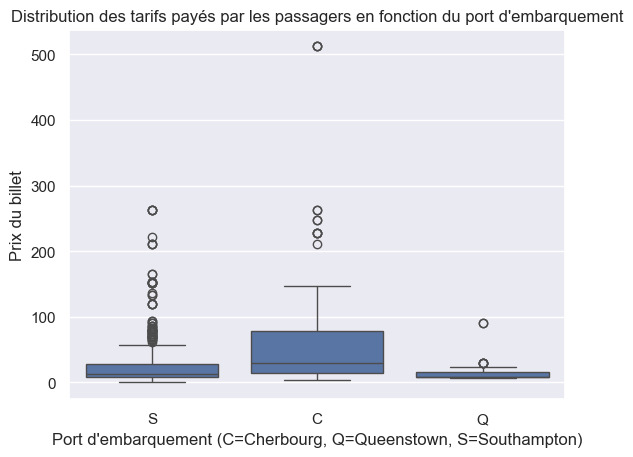

In [71]:
sns.set(style='darkgrid')

sns.boxplot(data=titanic_df, x='Embarked', y='Fare')

plt.title("Distribution des tarifs payés par les passagers en fonction du port d'embarquement")
plt.xlabel("Port d'embarquement (C=Cherbourg, Q=Queenstown, S=Southampton)")
plt.ylabel('Prix du billet')

plt.show()

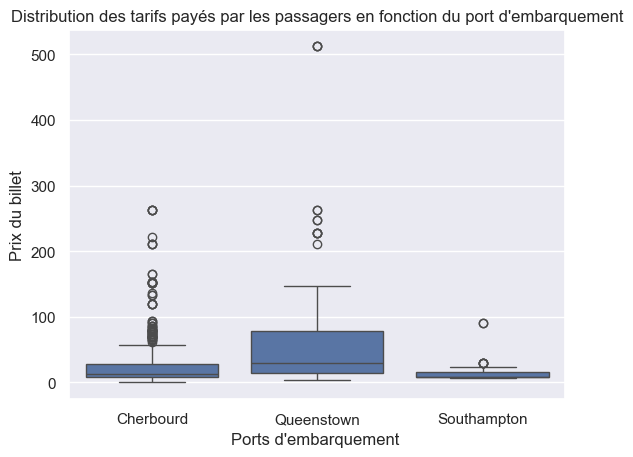

In [73]:
# Version avec modifications des ticks pour afficher le nom complet des ports d'embarquement
sns.set(style='darkgrid')

sns.boxplot(data=titanic_df, x='Embarked', y='Fare')
# (C=Cherbourg, Q=Queenstown, S=Southampton)
plt.xticks(
    ticks=[0,1,2], # Position automatique des ticks
    labels=['Cherbourd', 'Queenstown', 'Southampton']
)
plt.title("Distribution des tarifs payés par les passagers en fonction du port d'embarquement")
plt.xlabel("Ports d'embarquement ")
plt.ylabel('Prix du billet')

plt.show()

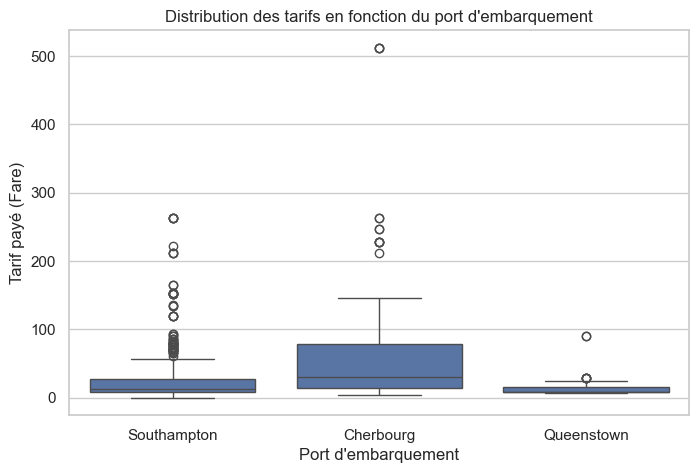

In [79]:
# Version avec remplacement des premieres lettres par le nom complet des ports dans une copie de titanic_df
titanic_mod = titanic_df.copy()
titanic_mod["Embarked"] = titanic_mod["Embarked"].replace({
    "C": "Cherbourg",
    "Q": "Queenstown",
    "S": "Southampton"
})

plt.figure(figsize=(8, 5))
sns.boxplot(data=titanic_mod, x="Embarked", y="Fare")

plt.title("Distribution des tarifs en fonction du port d'embarquement")
plt.xlabel("Port d'embarquement")
plt.ylabel("Tarif payé (Fare)")
plt.show()


**Exercice 16 - Visualisation de la répartition des tarifs des passagers :**
* Utilisez le DataFrame "titanic_df" pour créer un histogramme représentant la répartition des tarifs payés par les passagers.


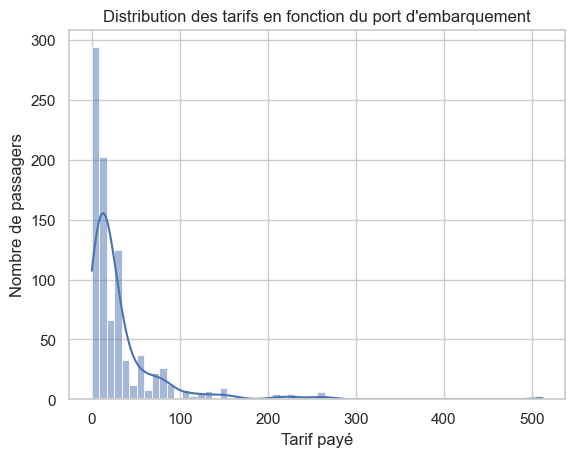

In [74]:
sns.set(style='whitegrid')

sns.histplot(data=titanic_df, x='Fare',kde=True)

plt.title("Distribution des tarifs en fonction du port d'embarquement")
plt.xlabel("Tarif payé")
plt.ylabel("Nombre de passagers")
plt.show()

**Exercice 17 - Comparaison des tarifs des passagers en fonction du sexe :**
* Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction du sexe (homme ou femme).


In [77]:
print(titanic_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

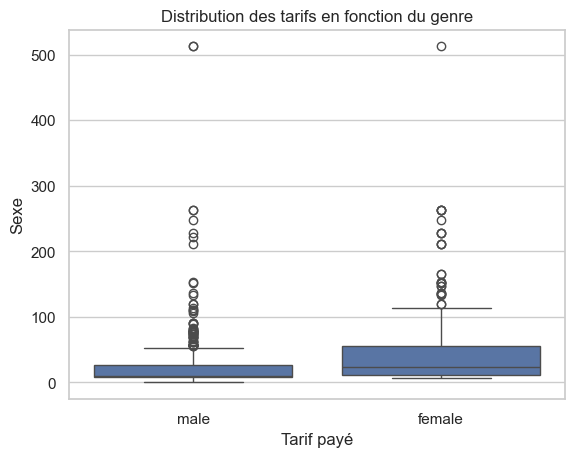

In [ ]:
sns.set(style='whitegrid')

sns.boxplot(data=titanic_df, x="Sex", y="Fare")

plt.title("Distribution des tarifs en fonction du genre")
plt.xlabel("Sexe")
plt.ylabel("Tarif Payé")
plt.show()

**Exercice 18 - Visualisation des tarifs des passagers en fonction du statut de survie :**
* Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction de leur statut de survie (survécu ou non).


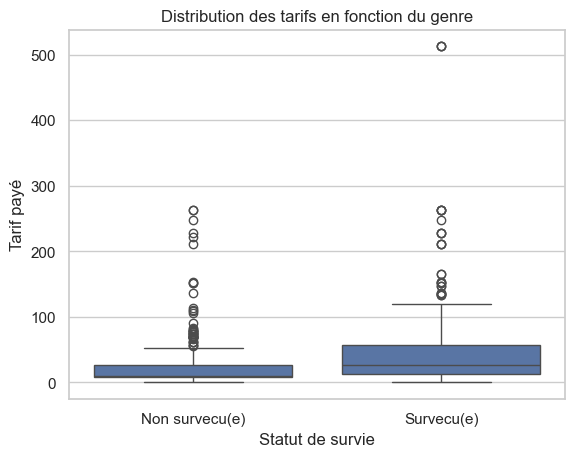

In [81]:
sns.set(style='whitegrid')

sns.boxplot(data=titanic_df, x="Survived", y="Fare")

plt.title("Distribution des tarifs en fonction du genre")
plt.xlabel("Statut de survie")
plt.ylabel("Tarif payé")
plt.xticks (
    ticks=[0,1], # Position automatique des ticks
    labels=['Non survecu(e)', 'Survecu(e)']
)
plt.show()

**Exercice 19 - Comparaison des âges des passagers en fonction du port d'embarquement**
* Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des âges des passagers en fonction du port d'embarquement.


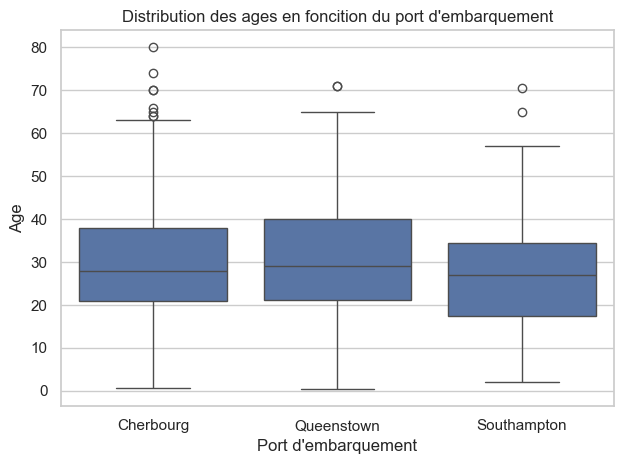

In [ ]:
sns.set(style='whitegrid')

sns.boxplot(data=titanic_df, x="Embarked", y="Age")

plt.title("Distribution des ages en fonction du port d'embarquement")
plt.xlabel("Port d'embarquement")
plt.ylabel("Age")
plt.xticks (
    ticks=[0,1,2], # Position automatique des ticks
    labels=['Cherbourg', 'Queenstown', 'Southampton']
)
plt.tight_layout()
plt.show()

**Exercice 20 - Visualisation de la répartition des âges des passagers :**
* Utilisez le DataFrame "titanic_df" pour créer un histogramme représentant la répartition des âges des passagers.


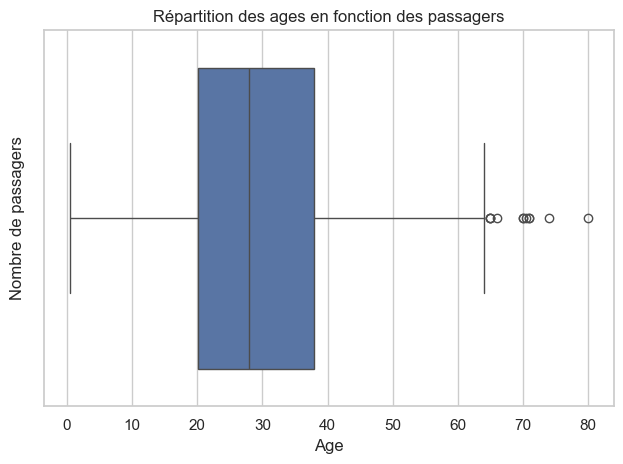

In [88]:
sns.set(style='whitegrid')

sns.boxplot(data=titanic_df, x=titanic_df['Age'].dropna())

plt.title("Répartition des ages en fonction des passagers")
plt.xlabel("Age")
plt.ylabel("Nombre de passagers")

plt.tight_layout()
plt.show()